In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('bmh')
plt.rcParams['text.usetex'] = False

In [11]:
df = pd.read_csv("NYT_Dataset.csv",index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100054 entries, 0 to 100053
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ID        100054 non-null  object
 1   title     100054 non-null  object
 2   topic     100054 non-null  object
 3   abstract  100054 non-null  object
 4   Date      100054 non-null  object
 5   keywords  100054 non-null  object
dtypes: object(6)
memory usage: 5.3+ MB


In [3]:
df.head()

,ID,title,topic,abstract,Date,keywords
0,nyt://article/178801fe-4679-5f12-985f-8344a86e...,"In Reversal, Pakistan Welcomes Outside Help Wi...",Foreign,Pakistan’s ambassador to the U.S. said his gov...,2008-01-01 05:00:00+00:00,['Assassinations and Attempted Assassinations'...
1,nyt://article/21acedcb-a7f6-5131-99cf-d3a47e33...,Fighting Intensifies After Election in Kenya,Foreign,"Kenya sank deeper into trouble, with a curfew ...",2008-01-01 05:00:00+00:00,"['Kenya', 'Demonstrations and Riots', 'Odinga'..."
2,nyt://article/357b5429-a9f8-5d33-a5eb-c013a201...,Israel: Olmert Curbs Settlements,Foreign,Prime Minister Ehud Olmert has sent a letter t...,2008-01-01 05:00:00+00:00,['West Bank']
3,nyt://article/619ca4ea-50e4-59e4-97bb-f206502c...,Gay Muslims Pack a Dance Floor of Their Own,Foreign,The monthly club night known as Gayhane is an ...,2008-01-01 05:00:00+00:00,"['Homosexuality', 'Islam', 'IMMIGRATION AND RE..."
4,nyt://article/73c49a5a-bcf1-5b8f-a15a-98d29003...,Iraqi Revelers Embrace the New Year,Foreign,"But even as partygoers embraced the New Year, ...",2008-01-01 05:00:00+00:00,"['ARMAMENT', 'DEFENSE AND MILITARY FORCES', 'I..."


In [4]:
df.iloc[0]["keywords"]

"['Assassinations and Attempted Assassinations', 'Pakistan', 'Bhutto', 'Benazir', 'Federal Bureau of Investigation', 'United Nations']"

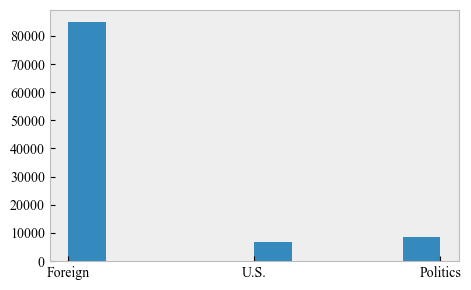

In [5]:
fig, ax =plt.subplots(figsize = (3*1.61,3))
df.topic.hist(ax = ax)
ax.grid(False)
fig.tight_layout()
fig.savefig("paper_imgs/hist_topic.png")

In [6]:
df["abs_count"] = df.abstract.apply(lambda x: len(x.split(" ")))
df["title_count"] = df.title.apply(lambda x: len(x.split(" ")))
df['key_count'] = df.keywords.apply(lambda x: len(eval(x)))

In [7]:
df.abs_count.describe()

count    100054.000000
mean         24.434975
std           6.381144
min           1.000000
25%          21.000000
50%          24.000000
75%          28.000000
max         238.000000
Name: abs_count, dtype: float64

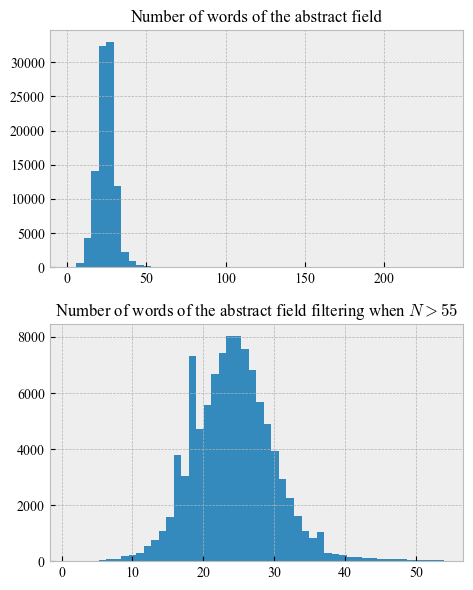

In [8]:
fig, ax =plt.subplots(2,1,figsize = (3*1.61,3*2))
df.abs_count.hist(ax = ax[0],bins = 50)
df.loc[df.abs_count<55].abs_count.hist(ax = ax[1],bins = 50)
ax[0].set_title("Number of words of the abstract field",fontsize = 12)
ax[1].set_title(r"Number of words of the abstract field filtering when $N>55$",fontsize = 12)
fig.tight_layout()
fig.savefig("paper_imgs/abstract_hist.png")
#ax[1].set_xlabel("Number of abstracs with that word count",fontsize = 8)

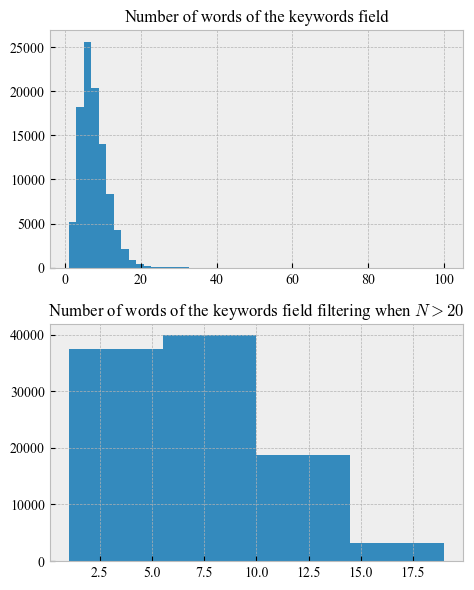

In [9]:
fig, ax =plt.subplots(2,1,figsize = (3*1.61,3*2))
df.key_count.hist(ax = ax[0],bins = 50)
df.loc[df.key_count<20].key_count.hist(ax = ax[1],bins = 4)
ax[0].set_title("Number of words of the keywords field",fontsize = 12)
ax[1].set_title(r"Number of words of the keywords field filtering when $N>20$",fontsize = 12)
fig.tight_layout()
fig.savefig("paper_imgs/keywords_hist.png")
#ax[1].set_xlabel("Number of abstracs with that word count",fontsize = 8)

In [10]:
df.loc[df.key_count>50].iloc[0]

ID             nyt://article/31e092b7-a20f-597e-a8c6-99461cde...
title             Obama Sets a New Tone for Alliance With Europe
topic                                                    Foreign
abstract       Speaking on the eve of a NATO meeting, Preside...
Date                                   2009-04-03 08:21:34+00:00
keywords       ['Obama', 'Barack', 'North Atlantic Treaty Org...
abs_count                                                     19
title_count                                                    9
key_count                                                    100
Name: 7310, dtype: object